This notebook is to investigate the issue of no buildings being built in some large areas starting in 2023 or so.

In [1]:
# %matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
run22 = pd.read_csv('run22_total.csv', index_col=0)

In [3]:
store = pd.HDFStore('./../runs/run22.h5')
parcels_lid = store['base/parcels'][['large_area_id']]

In [4]:
store

<class 'pandas.io.pytables.HDFStore'>
File path: ./../runs/run22.h5
/2016/buildings                                             frame        (shape->[2397008,11])
/2016/dropped_buildings                                     frame        (shape->[8283,12])   
/2016/households                                            frame        (shape->[1875551,8]) 
/2016/jobs                                                  frame        (shape->[1,4])       
/2016/parcels                                               frame        (shape->[1794449,15])
/2016/persons                                               frame        (shape->[4653064,7]) 
/2017/buildings                                             frame        (shape->[2398734,11])
/2017/dropped_buildings                                     frame        (shape->[9395,12])   
/2017/households                                            frame        (shape->[1882825,8]) 
/2017/jobs                                                  frame        (sha

In [46]:
run22

,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,...,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045
5,95,27,26,12.0,50,27.0,NaN,NaN,NaN,3,...,NaN,NaN,3.0,9.0,7.0,7.0,9.0,6.0,27.0,3.0
3,637,284,359,146.0,3086,NaN,NaN,NaN,6.0,129,...,22.0,11.0,19.0,14.0,16.0,24.0,19.0,21.0,14.0,12.0
125,2162,1197,1001,901.0,8308,34.0,33.0,16.0,119.0,830,...,536.0,627.0,208.0,228.0,356.0,74.0,93.0,180.0,69.0,180.0
99,474,318,281,284.0,7231,NaN,NaN,NaN,124.0,658,...,8.0,1.0,6.0,5.0,13.0,5.0,5.0,4.0,5.0,18.0
161,507,605,663,483.0,950,1020.0,966.0,285.0,406.0,475,...,145.0,106.0,101.0,153.0,108.0,134.0,102.0,120.0,46.0,46.0
115,178,33,14,NaN,834,NaN,NaN,9.0,10.0,12,...,NaN,NaN,NaN,3.0,122.0,4.0,4.0,2.0,4.0,NaN
147,211,96,48,12.0,199,NaN,25.0,70.0,45.0,51,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,695,279,170,182.0,1871,NaN,40.0,159.0,186.0,300,...,22.0,60.0,59.0,33.0,333.0,34.0,36.0,50.0,44.0,56.0


In [44]:
res = pd.DataFrame(index=parcels_lid.large_area_id.unique())
for year in range(2016, 2046):
    buildings_name = '{}/buildings'.format(year)
    buildings = store[buildings_name]
    b = buildings[['sqft_price_res', 'sqft_price_nonres', 'parcel_id']]
    b = b.merge(parcels_lid, left_on='parcel_id', right_index=True)
    bylid = b.groupby('large_area_id').mean()
    res[year] = bylid['sqft_price_res']

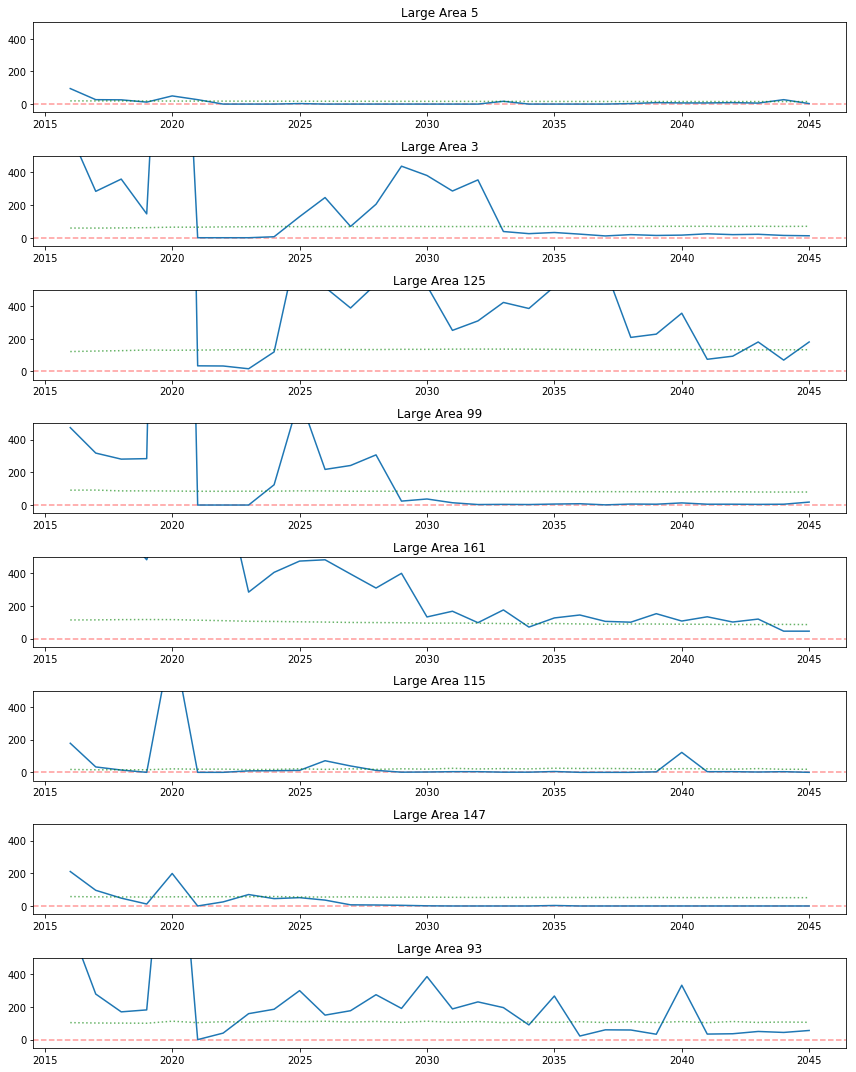

In [49]:
figure, axes_list = plt.subplots(len(run22), 1, figsize=(12, 15))
for i, ax in enumerate(axes_list):
    row = run22.fillna(0).iloc[i]
    ax.set_title('Large Area {}'.format(row.name))
    ax.axhline(y=0, color='red', alpha=0.4, linestyle='dashed')
    ax.set_ylim(bottom=-50, top=500)
    ax.plot(row.index, row.values)
    
    res_prices = res.fillna(0).iloc[i]
    ax.plot(res_prices.index, res_prices.values, color='green', alpha=0.6, linestyle='dotted')
    
figure.tight_layout()

In [5]:
zoning = store['base/zoning']

In [6]:
zoning

,type84,type82,type83,type81,max_far,type51,type53,type52,type33,type32,...,future_use,type61,type62,type21,type22,type23,type24,type25,type26,max_stories
parcel_id,,,,,,,,,,,,,,,,,,,,,
8275523,0,0,0,0,0.939633,0,0,0,0,0,...,COMMERCIAL,1,1,1,1,1,1,1,1,1.75
8275525,0,0,0,0,0.939633,0,0,0,0,0,...,COMMERCIAL,1,1,1,1,1,1,1,1,1.75
8275527,0,0,0,0,0.939633,0,0,0,0,0,...,COMMERCIAL,1,1,1,1,1,1,1,1,1.75
8275532,0,0,0,0,0.939633,0,0,0,0,0,...,COMMERCIAL,1,1,1,1,1,1,1,1,1.75
8275534,0,0,0,0,0.939633,0,0,0,0,0,...,COMMERCIAL,1,1,1,1,1,1,1,1,1.75
8275541,0,0,0,0,0.939633,0,0,0,0,0,...,COMMERCIAL,1,1,1,1,1,1,1,1,1.75
8275543,0,0,0,0,0.939633,0,0,0,0,0,...,COMMERCIAL,1,1,1,1,1,1,1,1,1.75
8275550,0,0,0,0,0.939633,0,0,0,0,0,...,COMMERCIAL,1,1,1,1,1,1,1,1,1.75
8275524,0,0,0,0,0.939633,0,0,0,0,0,...,COMMERCIAL,1,1,1,1,1,1,1,1,1.75
